In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import periodogram #Used in Frequency Feature

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay,roc_curve, auc
from sklearn.model_selection import GridSearchCV,train_test_split # Import train_test_split function


from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier,plot_tree # Import Decision Tree Classifier

import seaborn as sns





In [2]:
def plot2(eeg,channelAnno, eegchannel,sfreq, starttime, endtime):
    #eeg is the eeg dataframe you are using
    #channelanno is the labeled data you are plotting
    # eegchannel is the channel of EEG you wish to plot, for example F4-C4
    # sfreq is the sampling frequency
    # eegtime is the numpy array created that converts the EEG index to seconds, based on the sampling frequency
    # starttime is time in seconds of the start time of the EEG data that you wish to plot
    # endtime is the time in seconds of the end time of the EEG data that you wish to plot 
    leneeg = len(eeg) #Length of eeg file
    eegst=int(sfreq*starttime) # calculate the start eeg index
    eeget=int(sfreq*endtime)# calculate the end eeg index
    eegtime= np.arange(0,leneeg,1)/sfreq 
    fig,ax = plt.subplots(nrows = 1, ncols = 1, figsize=(16,5))
    eeg_trace = ax.plot(eegtime[eegst:eeget+1], eeg.loc[eegst:eeget,eegchannel],color='blue',label='EEG') # Plot EEG Data
    ax.set_ylabel('$\mu V$',color='blue',fontsize=16) # Set left hand yaxis label to 'Cases'.
    ax.set_xlabel('Seconds',color='green',fontsize=16) # Set left hand yaxis label to 'Cases'.
    ax2 = ax.twinx() # Create a second y axis on the right hand side of the plot using the same x axis.
    annotations = ax2.plot(channelAnno.loc[starttime:endtime,eegchannel],color='red',label='Seizure') # Plot Annotation data.
    ax2.set_ylabel('Seizure',color='red',fontsize=16) # Set right hand yaxis label to 'Deaths'.
    ax2.set_ylim(bottom=0) # Limit the right-hand y axis to start at 0.
    ax2.grid() # Plot a grid for the right hand y axis.
    ax2.legend(eeg_trace + annotations, [eegchannel,'Seizure'], fontsize=16, loc='best')
    ax.set_title('EEG and Anotation',fontsize=16) 
    plt.show

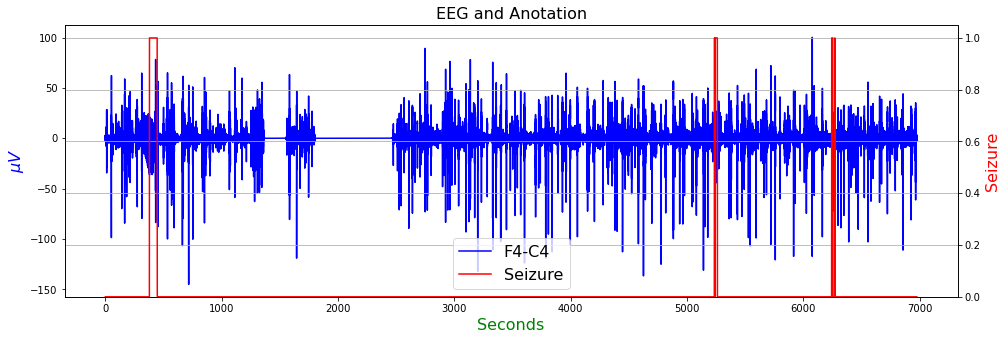

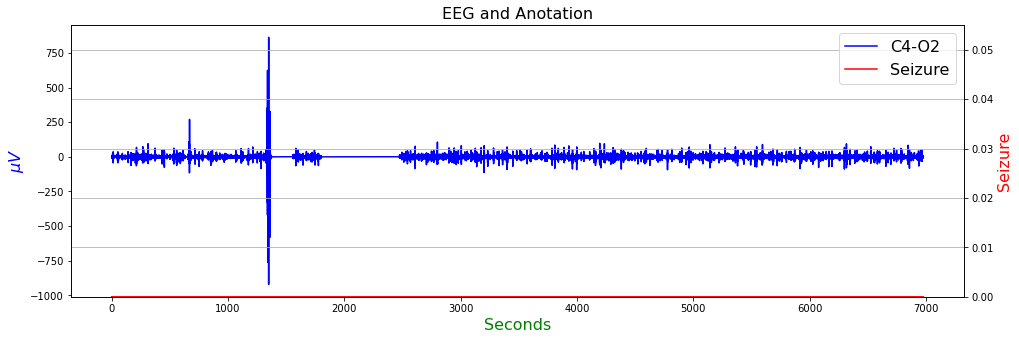

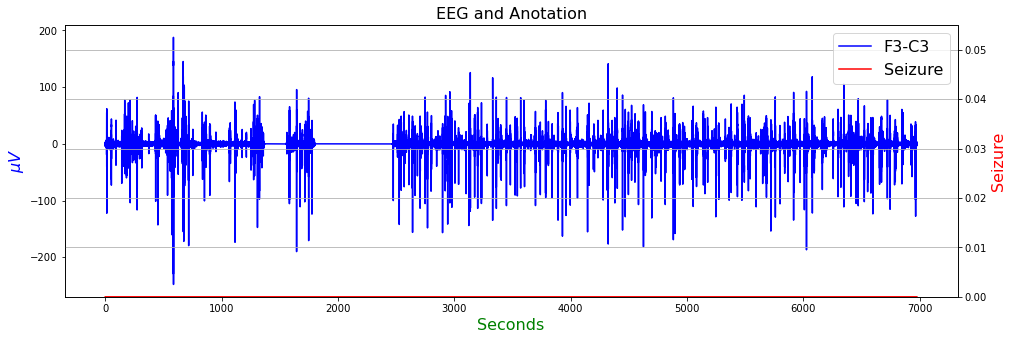

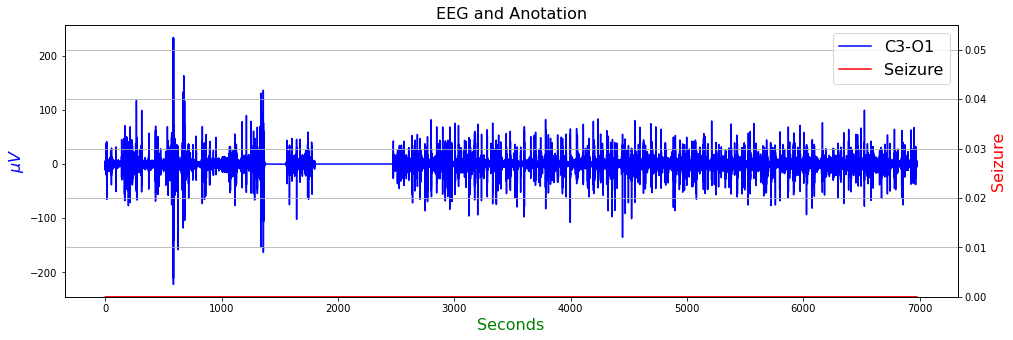

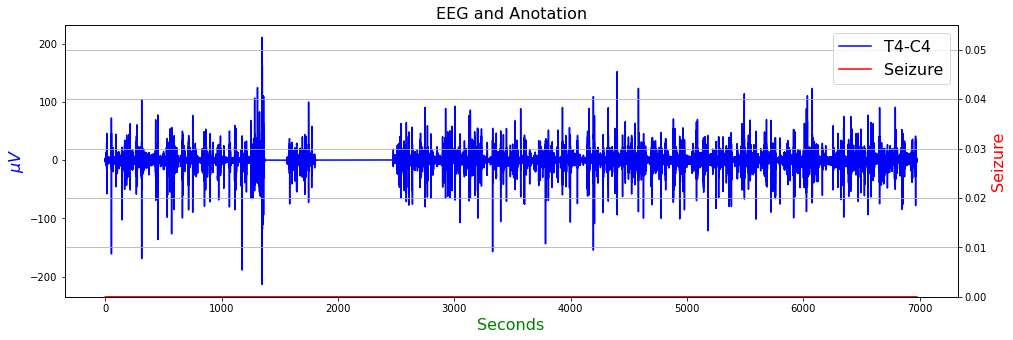

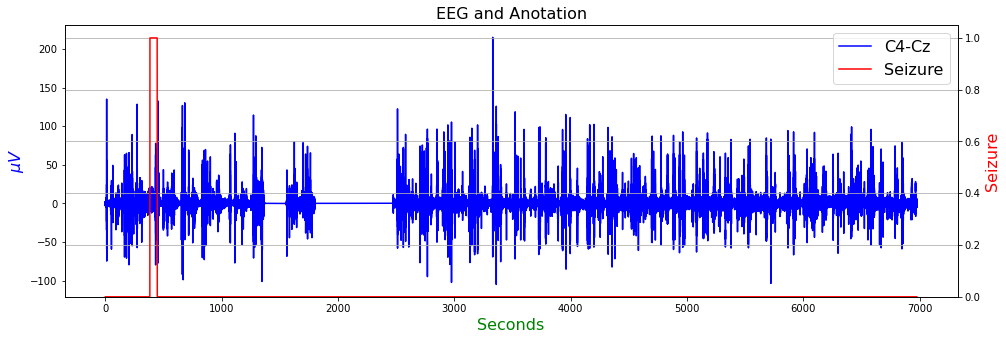

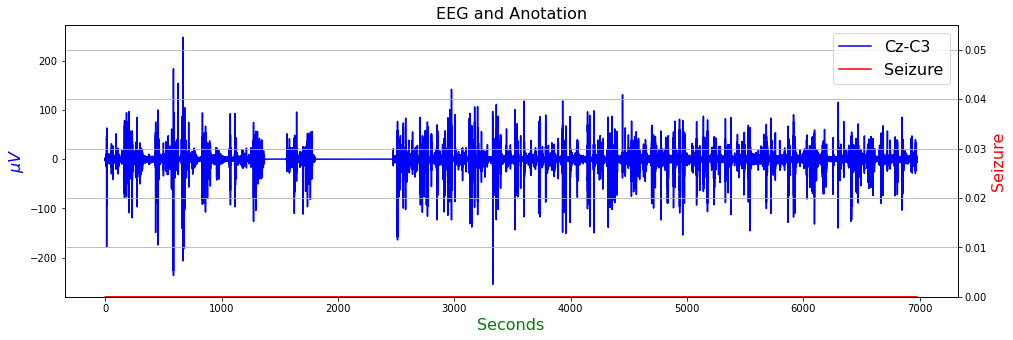

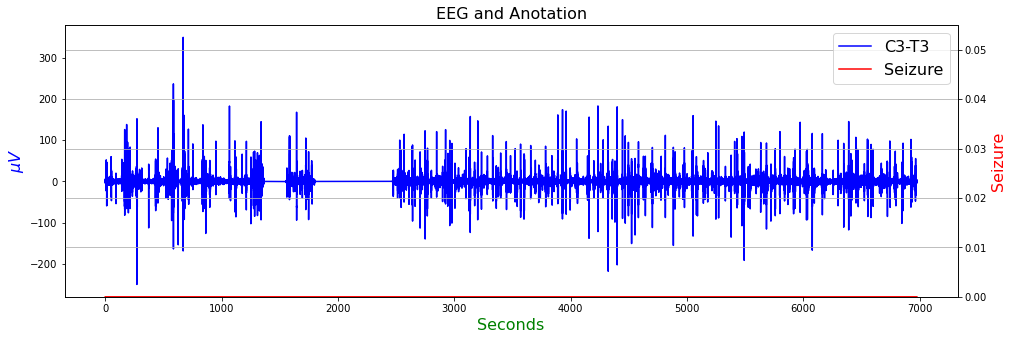

In [3]:
eeg =  pd.read_csv('EEG1_processed.csv')
channelAnno = pd.read_csv('eeg1_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
plot2(eeg, channelAnno,'F4-C4', 32, 0, len(eeg)/32)
plot2(eeg, channelAnno,'C4-O2', 32, 0, len(eeg)/32)
plot2(eeg, channelAnno,'F3-C3', 32, 0, len(eeg)/32)
plot2(eeg, channelAnno,'C3-O1', 32, 0, len(eeg)/32)
plot2(eeg, channelAnno,'T4-C4', 32, 0, len(eeg)/32)
plot2(eeg, channelAnno,'C4-Cz', 32, 0, len(eeg)/32)
plot2(eeg, channelAnno,'Cz-C3', 32, 0, len(eeg)/32)
plot2(eeg, channelAnno,'C3-T3', 32, 0, len(eeg)/32)

# Load in data

In [4]:
eeg1_csv =   pd.read_csv('EEG1_processed.csv')
eeg4_csv =   pd.read_csv('EEG4_processed.csv')
eeg5_csv =   pd.read_csv('EEG5_processed.csv')
eeg7_csv =   pd.read_csv('EEG7_processed.csv')
eeg9_csv =   pd.read_csv('EEG9_processed.csv')
eeg13_csv =   pd.read_csv('EEG13_processed.csv')
eeg14_csv =   pd.read_csv('EEG14_processed.csv')
eeg19_csv =   pd.read_csv('EEG19_processed.csv')
eeg21_csv =   pd.read_csv('EEG21_processed.csv')
eeg31_csv =   pd.read_csv('EEG31_processed.csv')
eeg34_csv =   pd.read_csv('EEG34_processed.csv')
eeg36_csv =   pd.read_csv('EEG36_processed.csv')
eeg38_csv =   pd.read_csv('EEG38_processed.csv')
eeg39_csv =   pd.read_csv('EEG39_processed.csv')
eeg44_csv =   pd.read_csv('EEG44_processed.csv')
eeg47_csv =   pd.read_csv('EEG47_processed.csv')
eeg51_csv =   pd.read_csv('EEG51_processed.csv')

In [5]:
channelAnno_1_csv = pd.read_csv('eeg1_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_4_csv = pd.read_csv('eeg4_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_5_csv = pd.read_csv('eeg5_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_7_csv = pd.read_csv('eeg7_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_9_csv = pd.read_csv('eeg9_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_13_csv = pd.read_csv('eeg13_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_14_csv = pd.read_csv('eeg14_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_19_csv = pd.read_csv('eeg19_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_21_csv = pd.read_csv('eeg21_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_31_csv = pd.read_csv('eeg31_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_34_csv = pd.read_csv('eeg34_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_36_csv = pd.read_csv('eeg36_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_38_csv = pd.read_csv('eeg38_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_39_csv = pd.read_csv('eeg39_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_44_csv = pd.read_csv('eeg44_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_47_csv = pd.read_csv('eeg47_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_51_csv = pd.read_csv('eeg51_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)

In [7]:
dataframes = [eeg1_csv, eeg4_csv, eeg5_csv, eeg7_csv, eeg9_csv, eeg13_csv, eeg14_csv, eeg19_csv, 
              eeg21_csv, eeg31_csv, eeg34_csv, eeg36_csv, eeg38_csv, eeg39_csv, eeg44_csv, 
              eeg47_csv, eeg51_csv]
              
dataframes_labels=[channelAnno_1_csv, channelAnno_4_csv, channelAnno_5_csv, channelAnno_7_csv, channelAnno_9_csv, 
                    channelAnno_13_csv, channelAnno_14_csv, channelAnno_19_csv, channelAnno_21_csv, channelAnno_31_csv, 
                    channelAnno_34_csv, channelAnno_36_csv, channelAnno_38_csv, channelAnno_39_csv, channelAnno_44_csv, 
                    channelAnno_47_csv, channelAnno_51_csv]


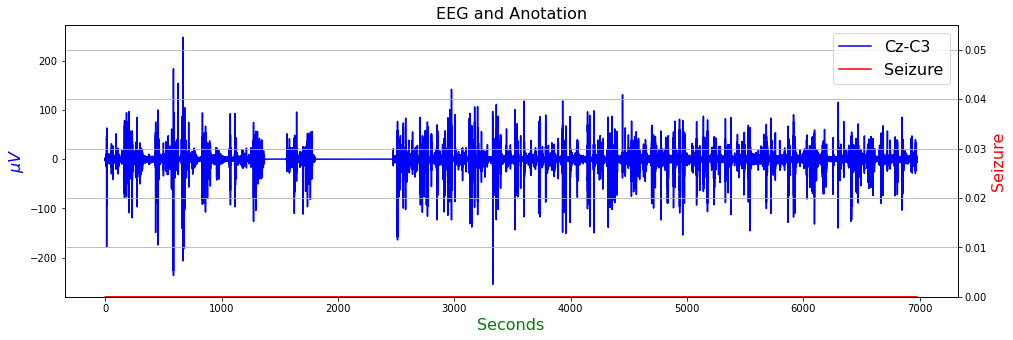

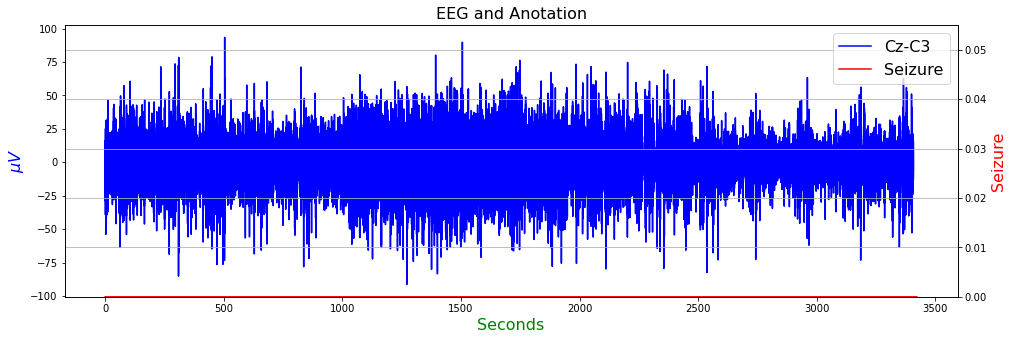

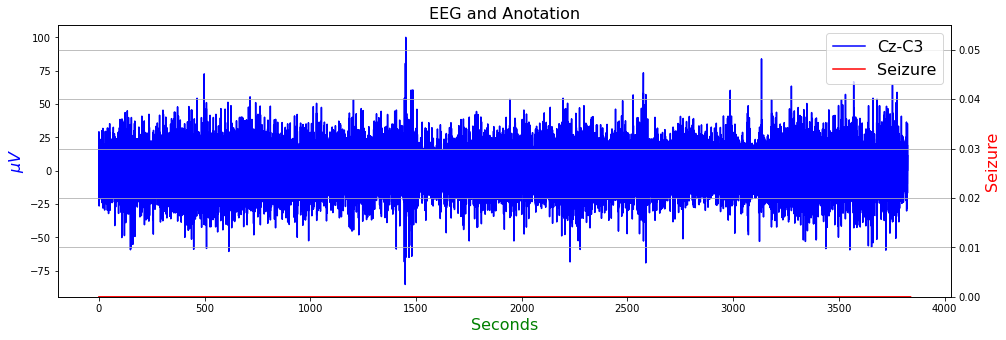

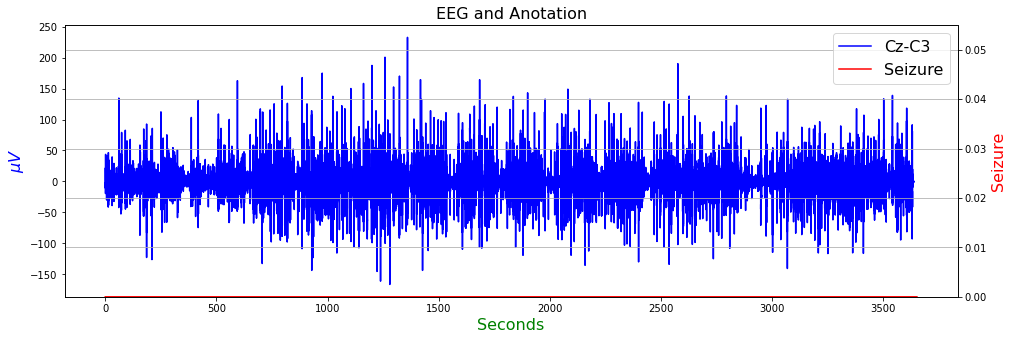

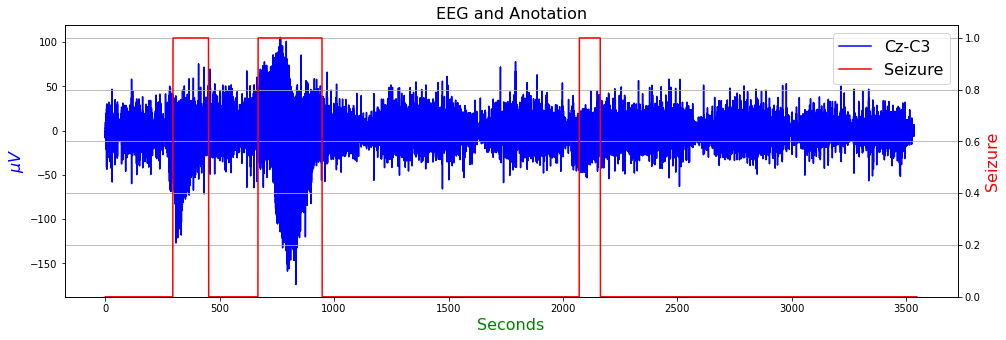

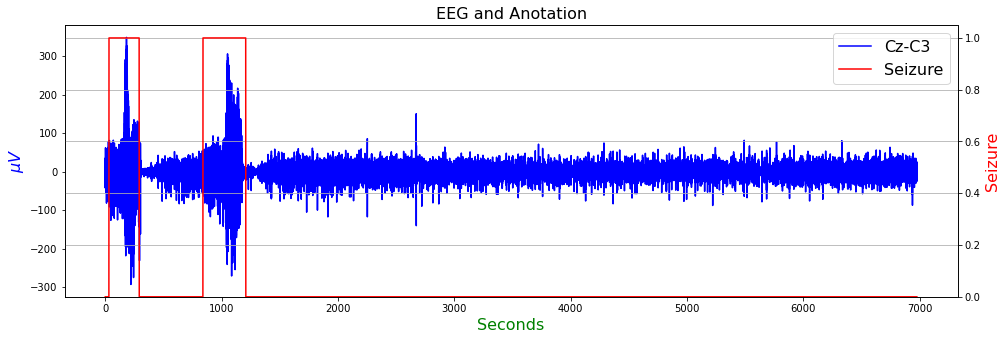

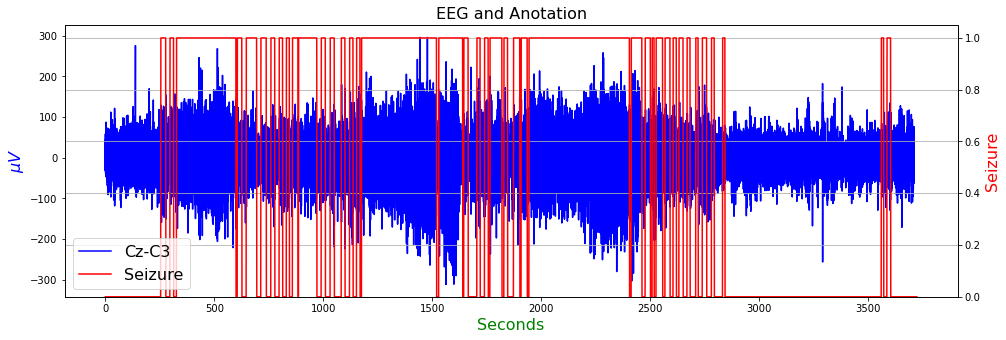

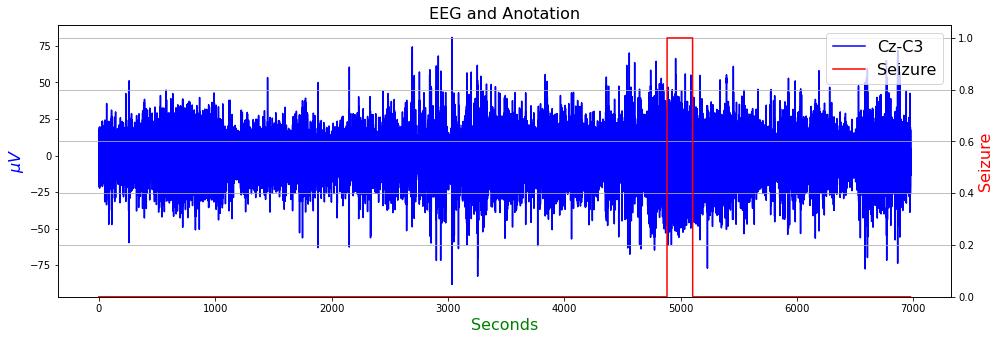

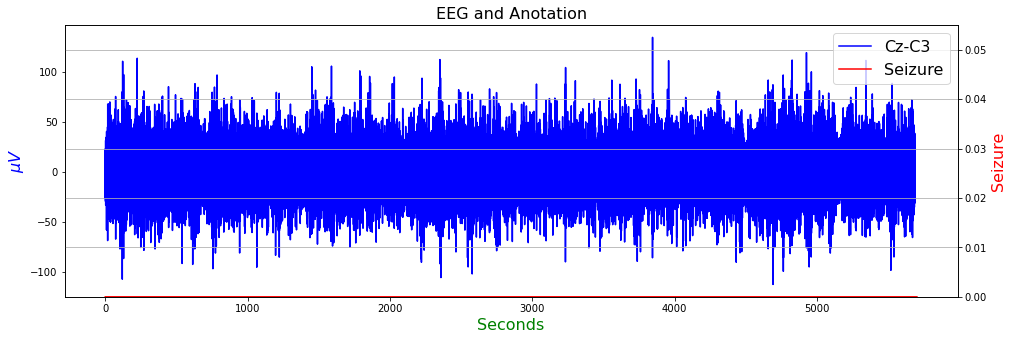

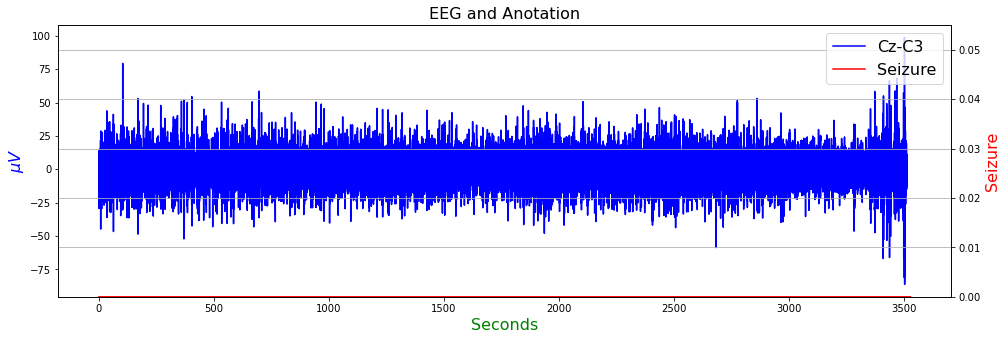

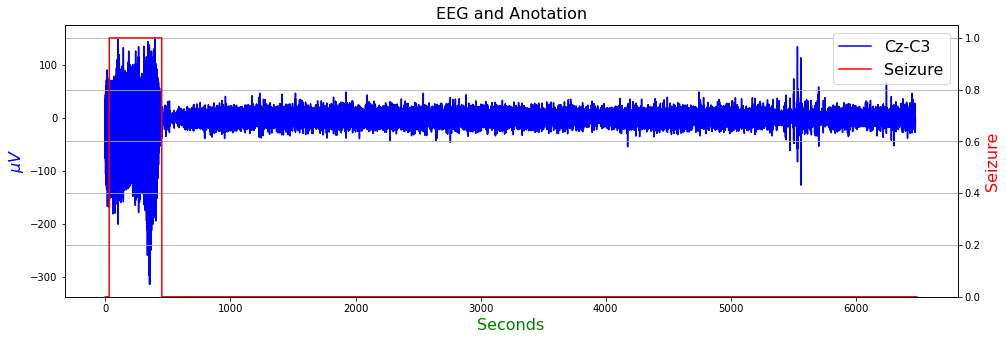

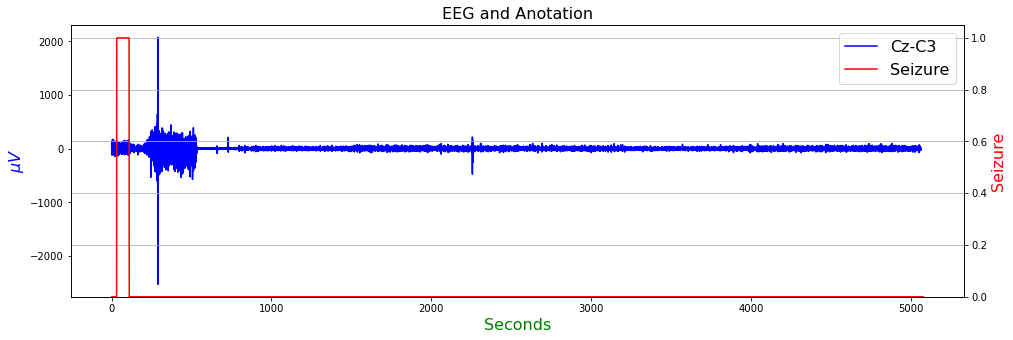

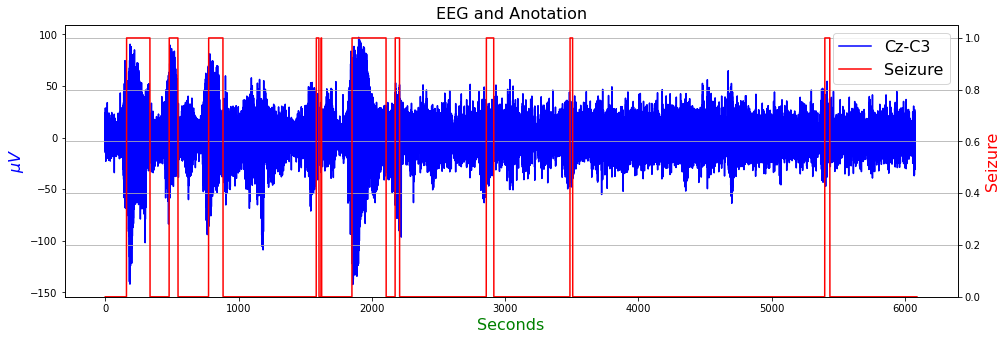

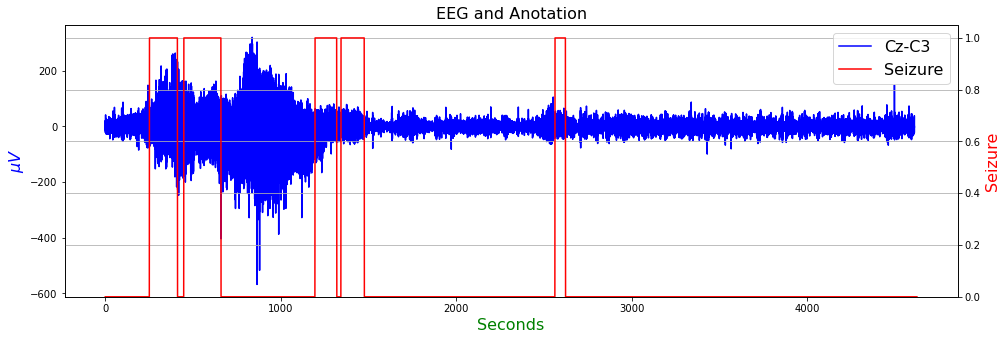

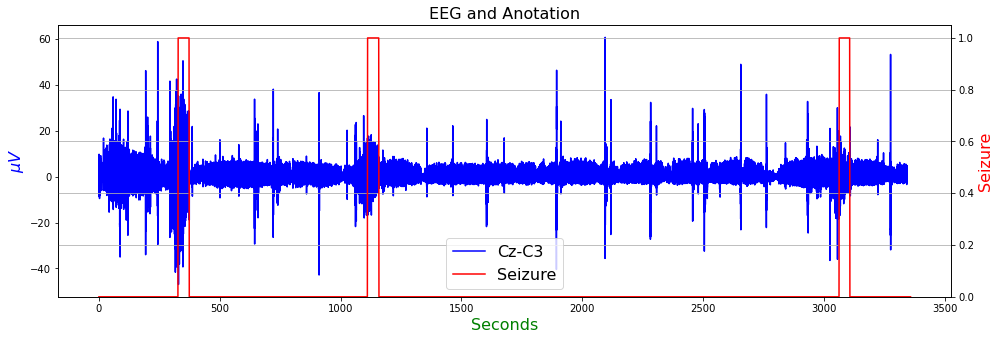

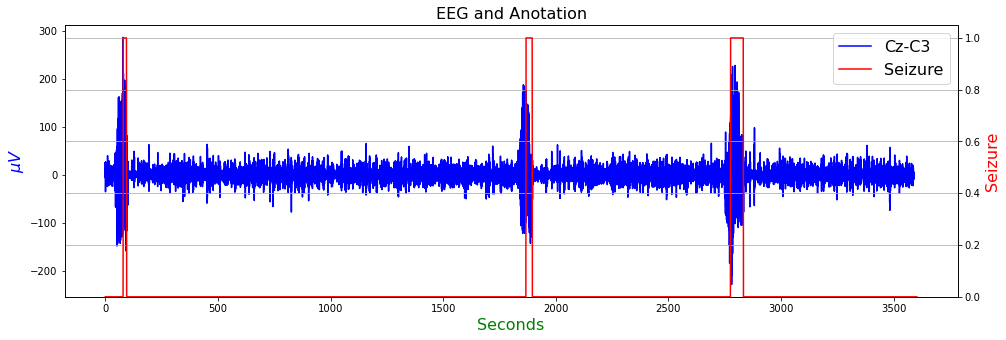

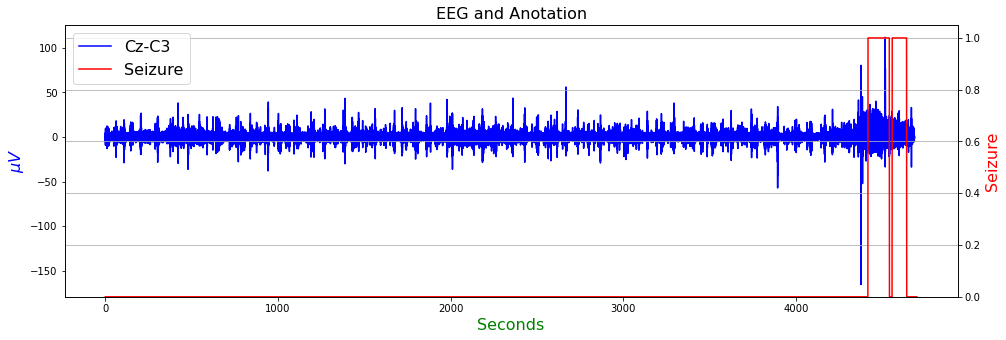

In [8]:
for df,dfl in zip(dataframes,dataframes_labels):
    plot2(df,dfl,'Cz-C3',32, 0, len(eeg1_csv)/32)


It appears eeg1 has 0 values - perhaps sensors were disconnected. Remove this from from data used.

In [9]:
dataframes = [eeg4_csv, eeg5_csv, eeg7_csv, eeg9_csv, eeg13_csv, eeg14_csv, eeg19_csv, 
              eeg21_csv, eeg31_csv, eeg34_csv, eeg36_csv, eeg38_csv, eeg39_csv, eeg44_csv, 
              eeg47_csv, eeg51_csv]
              
dataframes_labels=[channelAnno_4_csv, channelAnno_5_csv, channelAnno_7_csv, channelAnno_9_csv, 
                    channelAnno_13_csv, channelAnno_14_csv, channelAnno_19_csv, channelAnno_21_csv, channelAnno_31_csv, 
                    channelAnno_34_csv, channelAnno_36_csv, channelAnno_38_csv, channelAnno_39_csv, channelAnno_44_csv, 
                    channelAnno_47_csv, channelAnno_51_csv]

In [10]:
eeg_df = pd.concat([df for df in dataframes], ignore_index=True)
eeg_labels = pd.concat([dfl for dfl in dataframes_labels], ignore_index=True)

In [11]:
len(eeg_df), len(eeg_labels)

(2737728, 85792)

In [12]:
eeg_df.loc[(eeg_df==0).any(axis=1)]

,F4-C4,C4-O2,F3-C3,C3-O1,T4-C4,C4-Cz,Cz-C3,C3-T3


In [13]:
eeg_data = pd.melt(eeg_df)


# Perform Analysis on Cz-C3 channel

# Line Length

In [14]:
def LLcalculation(N, epoch):
    LL = sum(np.absolute(epoch[i+1]-epoch[i]) for i in range(N-1))
    return LL

In [15]:
NEpoch = 256
Noverlap=128
numberofEpochs = (len(eeg_df)-NEpoch)//(NEpoch-Noverlap) + 1 # Use integer divison // to get exact number of epochs
numberofEpochs

21387

In [16]:
len(eeg_df)

2737728

In [17]:
epochstart=0
LL_Feature = np.array([])
for i in range(numberofEpochs):
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,"Cz-C3"].to_numpy()
    epochstart += Noverlap
    LL_Feature=np.append(LL_Feature,LLcalculation(NEpoch, Epoch))

In [18]:
len(LL_Feature), LL_Feature

(21387,
 array([1865.32287269, 1866.89799573, 1793.31220758, ...,  499.05362299,
         309.98404246,  309.64627161]))

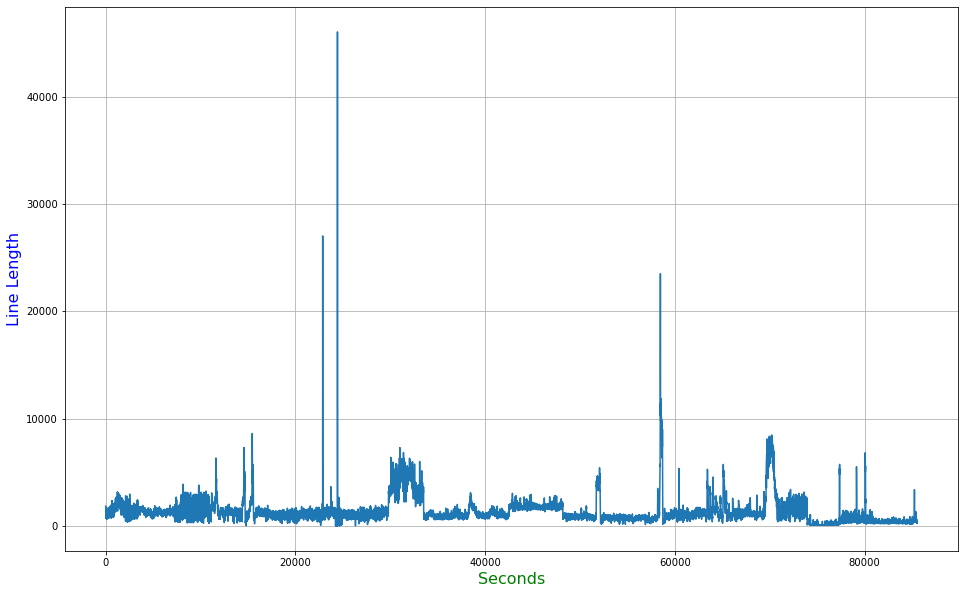

In [19]:
featuretime= np.arange(1,numberofEpochs+1,1)*4 # Converting the Feature index to seconds, ie. a new feature value is generated every 4 seconds.
plt.figure(figsize=(16,10))
plt.plot(featuretime, LL_Feature)
plt.ylabel('Line Length', fontsize=16, color='blue')
plt.xlabel('Seconds',color='green',fontsize=16)
plt.grid()
plt.show()

# Root Mean Squared Amplitude

In [21]:
def RMSAcalculation(N, epoch):
    RMSA = np.sqrt((1/N)*sum((epoch[i])**2 for i in range(N)))
    return RMSA

In [22]:
epochstart=0
RMSA_Feature = np.array([])
for i in range(numberofEpochs):
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,'Cz-C3'].to_numpy()
    epochstart += Noverlap
    RMSA_Feature=np.append(RMSA_Feature,RMSAcalculation(NEpoch, Epoch))

In [23]:
len(RMSA_Feature), RMSA_Feature

(21387,
 array([14.06643339, 13.38576462, 13.33121082, ...,  7.35354585,
         3.21212657,  2.93259702]))

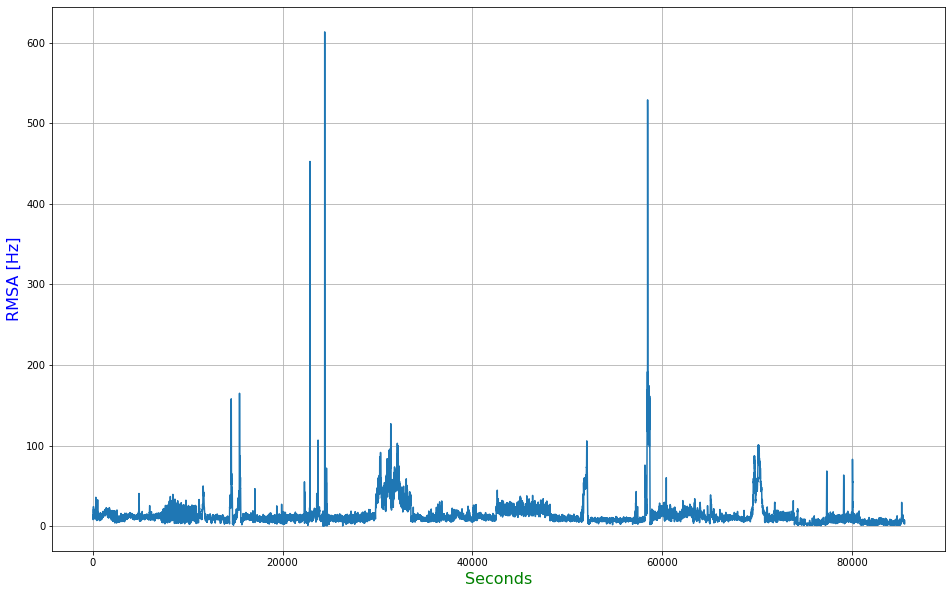

In [24]:
featuretime= np.arange(1,numberofEpochs+1,1)*4 # Converting the Feature index to seconds, ie. a new feature value is generated every 4 seconds.
plt.figure(figsize=(16,10))
plt.plot(featuretime, RMSA_Feature)
plt.ylabel('RMSA [Hz]', fontsize=16, color='blue')
plt.xlabel('Seconds',color='green',fontsize=16)
plt.grid()
plt.show()

# Non Linear Energy

In [25]:
def NLEcalculation(N, epoch):
    NLE = (1/(N-2))*sum(((epoch[i+1])**2 - epoch[i]*epoch[i+2]) for i in range(N-2))
    return NLE

In [26]:
epochstart=0
NLE_Feature = np.array([])
for i in range(numberofEpochs):
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,'Cz-C3'].to_numpy()
    epochstart += Noverlap
    NLE_Feature=np.append(NLE_Feature,NLEcalculation(NEpoch, Epoch))

In [27]:
len(NLE_Feature), NLE_Feature

(21387,
 array([126.32640619, 144.00492026, 126.47670803, ...,  12.68837167,
          3.56823171,   3.50373867]))

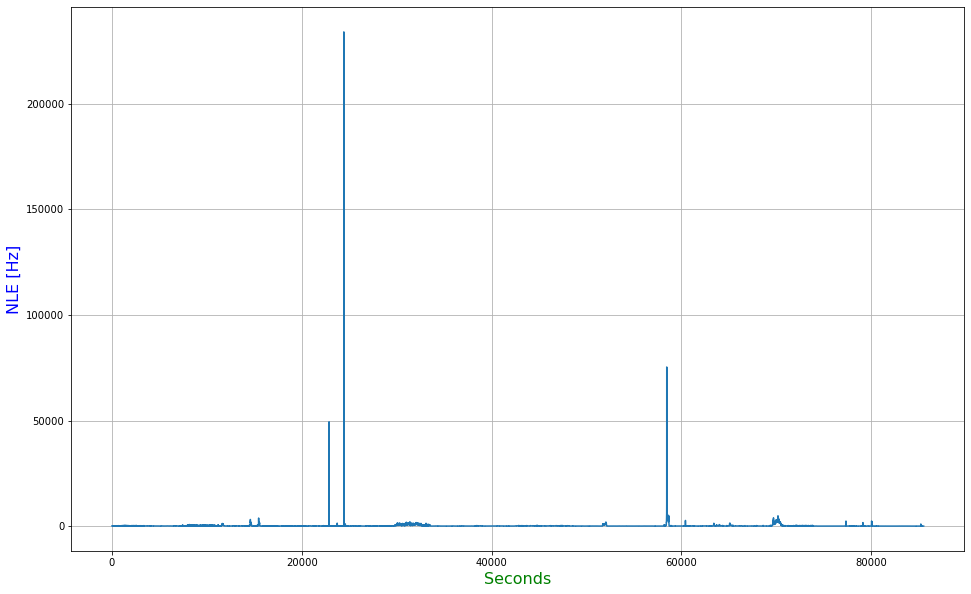

In [28]:
featuretime= np.arange(1,numberofEpochs+1,1)*4 # Converting the Feature index to seconds, ie. a new feature value is generated every 4 seconds.
plt.figure(figsize=(16,10))
plt.plot(featuretime, NLE_Feature)
plt.ylabel('NLE [Hz]', fontsize=16, color='blue')
plt.xlabel('Seconds',color='green',fontsize=16)
plt.grid()
plt.show()

# 1st Hjorth Parameter: Activity

In [29]:
def Meancalculation(N, epoch):
    Mean = (1/N)*sum((epoch[i]) for i in range(N))
    return Mean

In [30]:
def Activitycalculation(N, epoch):
    Mean = Meancalculation(N, epoch)
    Activity = (1/N)*(sum(((epoch[i] - Mean)**2) for i in range(N)))
    return Activity

In [31]:
epochstart=0
Activity_Feature = np.array([])
for i in range(numberofEpochs):
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,'Cz-C3'].to_numpy()
    epochstart += Noverlap
    Activity_Feature=np.append(Activity_Feature,Activitycalculation(NEpoch, Epoch))

In [32]:
len(Activity_Feature), np.where(Activity_Feature==0)

(21387, (array([], dtype=int64),))

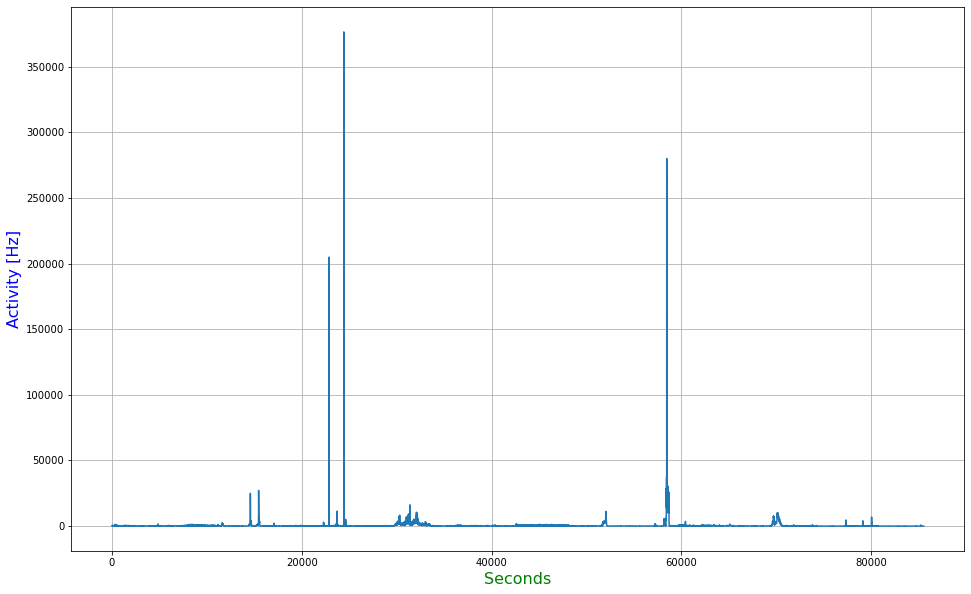

In [33]:
featuretime= np.arange(1,numberofEpochs+1,1)*4 # Converting the Feature index to seconds, ie. a new feature value is generated every 4 seconds.
plt.figure(figsize=(16,10))
plt.plot(featuretime, Activity_Feature)
plt.ylabel('Activity [Hz]', fontsize=16, color='blue')
plt.xlabel('Seconds',color='green',fontsize=16)
plt.grid()
plt.show()

# 2nd Hjorth Parameter: Mobility

In [34]:
def MeanFirstDeriv(N, epoch):
    Mean = (1/(N-1))*sum((epoch[i+1]-epoch[i]) for i in range(N-1))
    return Mean

In [35]:
def VarFirstDeriv(N,epoch):
    Mean = MeanFirstDeriv(N, epoch)
    Var = (1/(N-1))*sum(((epoch[i+1]- epoch[i])- Mean)**2 for i in range(N-1))
    return Var

In [36]:
def Mobilitycalculation(N, epoch):
    Var = VarFirstDeriv(N, epoch)
    Activity = Activitycalculation(N,epoch)
    Mobility = np.sqrt(Var/Activity)
    return Mobility

In [37]:
epochstart=0
Mobility_Feature = np.array([])
for i in range(numberofEpochs):
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,'Cz-C3'].to_numpy()
    epochstart += Noverlap
    Mobility_Feature=np.append(Mobility_Feature, Mobilitycalculation(NEpoch, Epoch))

In [38]:
len(Mobility_Feature), Mobility_Feature

(21387,
 array([0.70228238, 0.76754528, 0.73966671, ..., 0.37758896, 0.498283  ,
        0.54678553]))

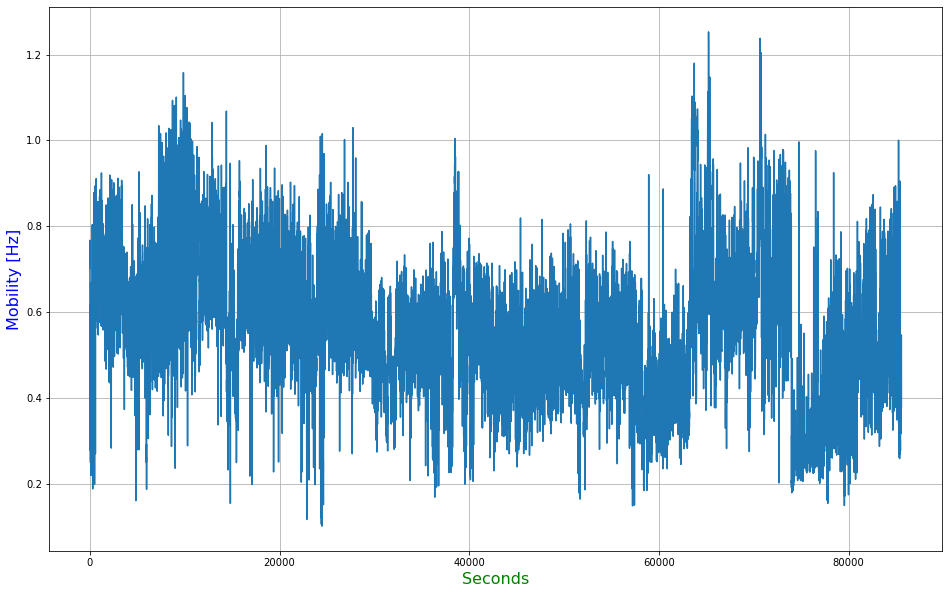

In [39]:
featuretime= np.arange(1,numberofEpochs+1,1)*4 # Converting the Feature index to seconds, ie. a new feature value is generated every 4 seconds.
plt.figure(figsize=(16,10))
plt.plot(featuretime, Mobility_Feature)
plt.ylabel('Mobility [Hz]', fontsize=16, color='blue')
plt.xlabel('Seconds',color='green',fontsize=16)
plt.grid()
plt.show()

# 3rd Hjorth Parameter: Complexity

In [40]:
def MeanSecondDeriv(N, epoch):
    Mean = (1/N-2)*sum(((epoch[i+2] - epoch[i+1])-(epoch[i+1] - epoch[i])) for i in range(N-2))
    return Mean

In [41]:
def VarSecondDeriv(N,epoch):
    Mean = MeanSecondDeriv(N, epoch)
    Var = (1/(N-2))*sum((((epoch[i+2] - epoch[i+1])-(epoch[i+1] - epoch[i]))- Mean)**2 for i in range(N-2))
    return Var

In [42]:
def Complexitycalculation(N, epoch):
    Var = VarSecondDeriv(N, epoch)
    Activity = Activitycalculation(N,epoch)
    Complexity = np.sqrt(Var/Activity)
    return Complexity

In [43]:
epochstart=0
Complexity_Feature = np.array([])
for i in range(numberofEpochs):
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,'Cz-C3'].to_numpy()
    epochstart += Noverlap
    Complexity_Feature=np.append(Complexity_Feature, Complexitycalculation(NEpoch, Epoch))

In [44]:
len(Complexity_Feature), Complexity_Feature

(21387,
 array([0.83720756, 0.97958241, 1.4665126 , ..., 1.24205446, 0.75496781,
        0.73467289]))

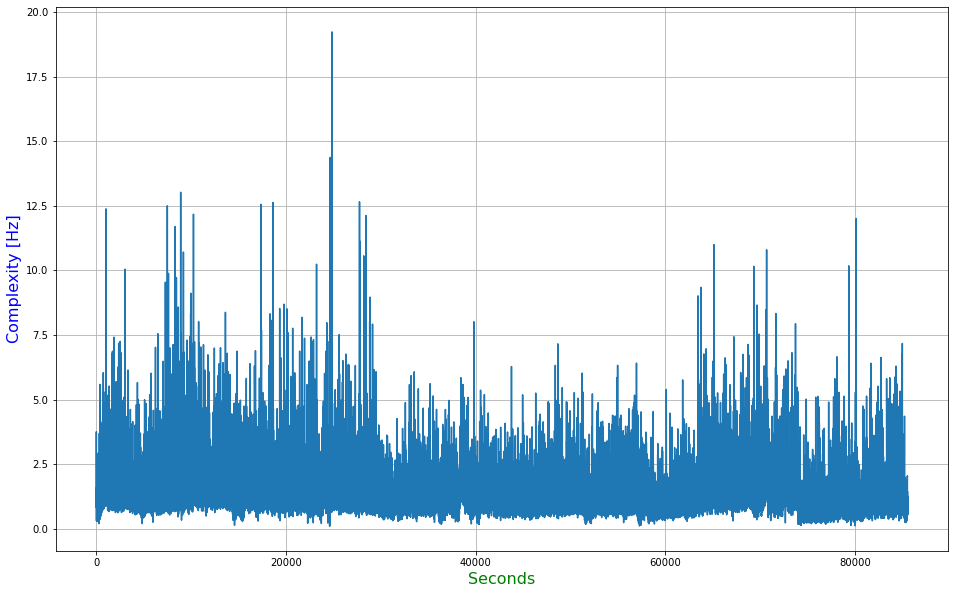

In [45]:
featuretime= np.arange(1,numberofEpochs+1,1)*4 # Converting the Feature index to seconds, ie. a new feature value is generated every 4 seconds.
plt.figure(figsize=(16,10))
plt.plot(featuretime, Complexity_Feature)
plt.ylabel('Complexity [Hz]', fontsize=16, color='blue')
plt.xlabel('Seconds',color='green',fontsize=16)
plt.grid()
plt.show()

# Intensity Weighted Mean Frequency (IWMF)

In [46]:
def fmcalculation(psd, fs, N):
    df = fs/N # fs is the sampling freaquency = 32Hz
    num = df * sum(psd[i]*i for i in range((N//2)-1))
    den = sum(psd[i] for i in range((N//2)-1))
    #print(den)
    return num/den

In [47]:
epochstart=0
FM_Feature = np.array([])
for i in range(numberofEpochs):
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,'Cz-C3'].to_numpy()
    PSD = periodogram(Epoch,fs=32,window='hann',detrend=False)[1]
    epochstart += Noverlap
    FM_Feature=np.append(FM_Feature,fmcalculation(PSD, 32, NEpoch))

In [48]:
epochstart = 100
for i in range (500):
    epochstart = 100
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,'Cz-C3'].to_numpy()
    PSD = periodogram(Epoch,fs=32,window='hann',detrend=False)[1]
    den = sum(PSD[i] for i in range((NEpoch//2)-1))


In [49]:
len(FM_Feature)

21387

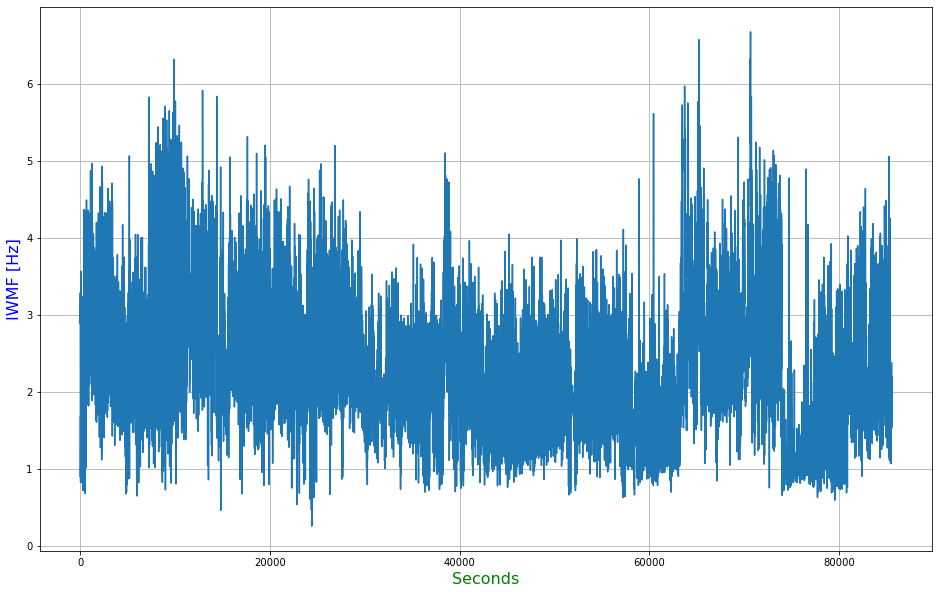

In [50]:
featuretime= np.arange(1,numberofEpochs+1,1)*4 # Converting the Feature index to seconds, ie. a new feature value is generated every 4 seconds.
plt.figure(figsize=(16,10))
plt.plot(featuretime, FM_Feature)
plt.ylabel('IWMF [Hz]', fontsize=16, color='blue')
plt.xlabel('Seconds',color='green',fontsize=16)
plt.grid()
plt.show()

# Intensity Weighted Bandwidth

In [51]:
def bwcalculation(psd, fs, N):
    fm = fmcalculation(psd, fs, N)
    df = fs/N # fs is the sampling freaquency = 32Hz   
    num = sum(psd[i]*((fm - i*df)**2) for i in range((N//2)-1))
    den = sum(psd[i] for i in range((N//2)-1))
    return np.sqrt(num/den)

In [52]:
epochstart=0
BW_Feature = np.array([])
for i in range(numberofEpochs):
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,'Cz-C3'].to_numpy()
    PSD = periodogram(Epoch,fs=32,window='hann',detrend=False)[1]
    epochstart += Noverlap
    BW_Feature=np.append(BW_Feature,bwcalculation(PSD, 32, NEpoch))

In [53]:
BW_Feature,len(BW_Feature)

(array([2.59850869, 2.07000418, 2.52621715, ..., 1.82710427, 1.80747842,
        2.18259397]),
 21387)

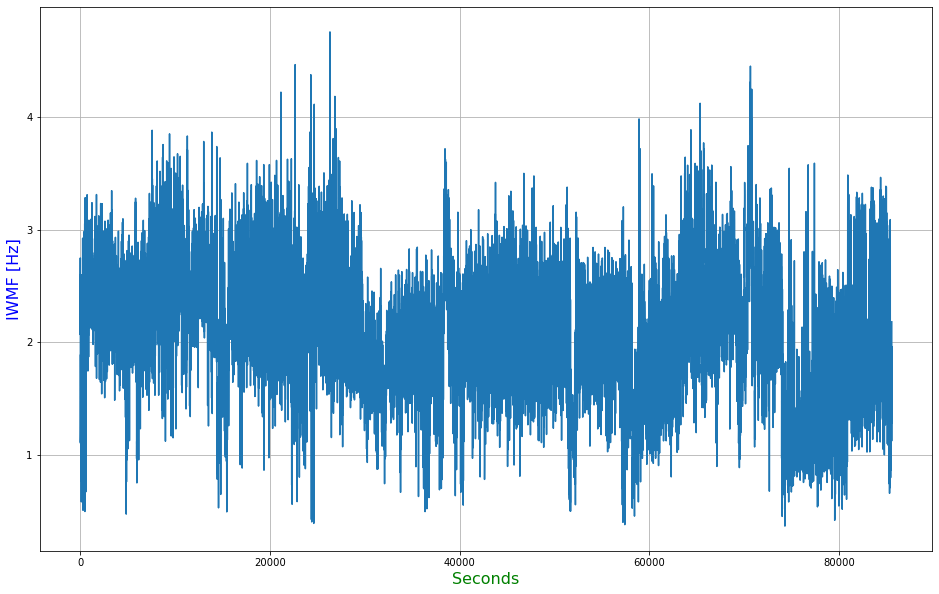

In [54]:
featuretime= np.arange(1,numberofEpochs+1,1)*4 # Converting the Feature index to seconds, ie. a new feature value is generated every 4 seconds.
plt.figure(figsize=(16,10))
plt.plot(featuretime, BW_Feature)
plt.ylabel('IWMF [Hz]', fontsize=16, color='blue')
plt.xlabel('Seconds',color='green',fontsize=16)
plt.grid()
plt.show()

# Total Power

In [55]:
def tpcalculation(psd, N):
    tp = sum(psd[i] for i in range((N//2)-1))
    return tp

In [56]:
epochstart=0
TP_Feature = np.array([])
for i in range(numberofEpochs):
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,'Cz-C3'].to_numpy()
    PSD = periodogram(Epoch,fs=32,window='hann',detrend=False)[1]
    epochstart += Noverlap
    TP_Feature=np.append(TP_Feature,tpcalculation(PSD,  NEpoch))

In [57]:
TP_Feature,len(TP_Feature)

(array([1599.0399638 , 1205.24965065, 1872.1160231 , ...,   86.87176731,
          99.84606757,   57.47606096]),
 21387)

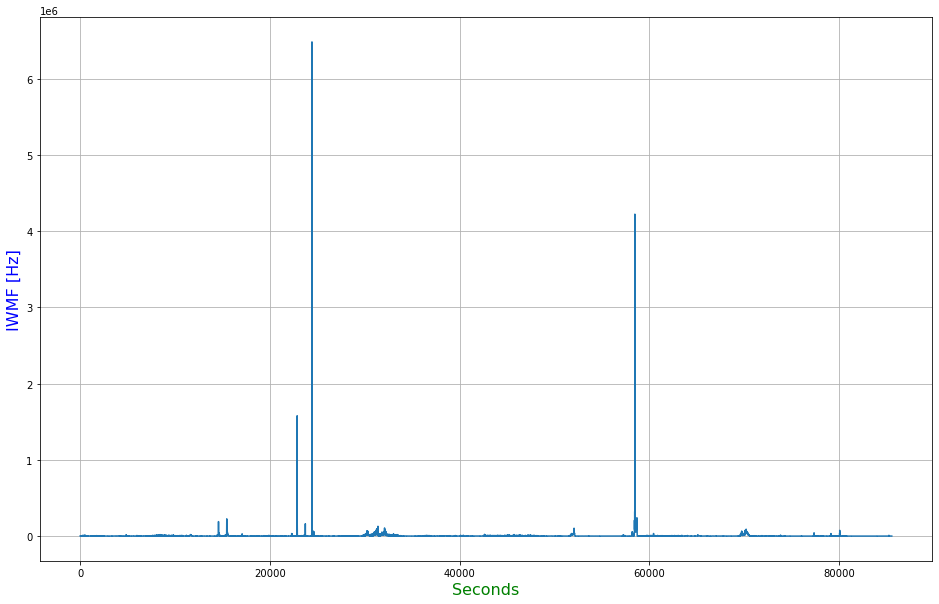

In [58]:
featuretime= np.arange(1,numberofEpochs+1,1)*4 # Converting the Feature index to seconds, ie. a new feature value is generated every 4 seconds.
plt.figure(figsize=(16,10))
plt.plot(featuretime, TP_Feature)
plt.ylabel('IWMF [Hz]', fontsize=16, color='blue')
plt.xlabel('Seconds',color='green',fontsize=16)
plt.grid()
plt.show()

# Peak Frequency

In [59]:
def pfcalculation(psd, fs, N):
    k=0
    max = psd[0]
    for i in range(1,128):
        if (psd[i] > max):
            k = i
            max = psd[i]
    return k * (fs/N)

In [60]:
epochstart=0
PF_Feature = np.array([])
for i in range(numberofEpochs):
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,'Cz-C3'].to_numpy()
    PSD = periodogram(Epoch,fs=32,window='hann',detrend=False)[1]
    epochstart += Noverlap
    PF_Feature=np.append(PF_Feature,pfcalculation(PSD, 32, NEpoch))

In [61]:
PF_Feature,len(PF_Feature)

(array([1.75, 2.  , 0.75, ..., 0.75, 0.75, 1.  ]), 21387)

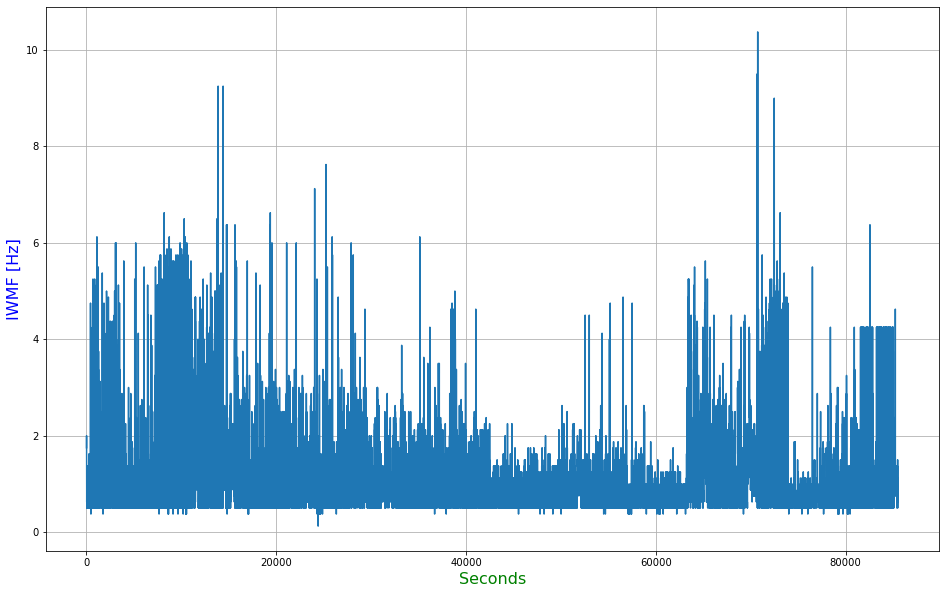

In [62]:
featuretime= np.arange(1,numberofEpochs+1,1)*4 # Converting the Feature index to seconds, ie. a new feature value is generated every 4 seconds.
plt.figure(figsize=(16,10))
plt.plot(featuretime, PF_Feature)
plt.ylabel('IWMF [Hz]', fontsize=16, color='blue')
plt.xlabel('Seconds',color='green',fontsize=16)
plt.grid()
plt.show()

# Spectral Edge Frequency

In [63]:
def SEF90calculation(psd, fs, N):
    tp = tpcalculation(psd, N)
    sef90 = 0
    i = 0
    while(sef90< 0.9*tp):
        sef90+= psd[i]
        i+=1
    sef90 = (i-1)*(fs/N)
    return sef90

In [64]:
epochstart=0
SEF90_Feature = np.array([])
for i in range(numberofEpochs):
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,'Cz-C3'].to_numpy()
    PSD = periodogram(Epoch,fs=32,window='hann',detrend=False)[1]
    epochstart += Noverlap
    SEF90_Feature=np.append(SEF90_Feature,SEF90calculation(PSD, 32, NEpoch))

In [65]:
SEF90_Feature,len(SEF90_Feature)

(array([6.875, 5.875, 6.125, ..., 3.75 , 3.875, 4.25 ]), 21387)

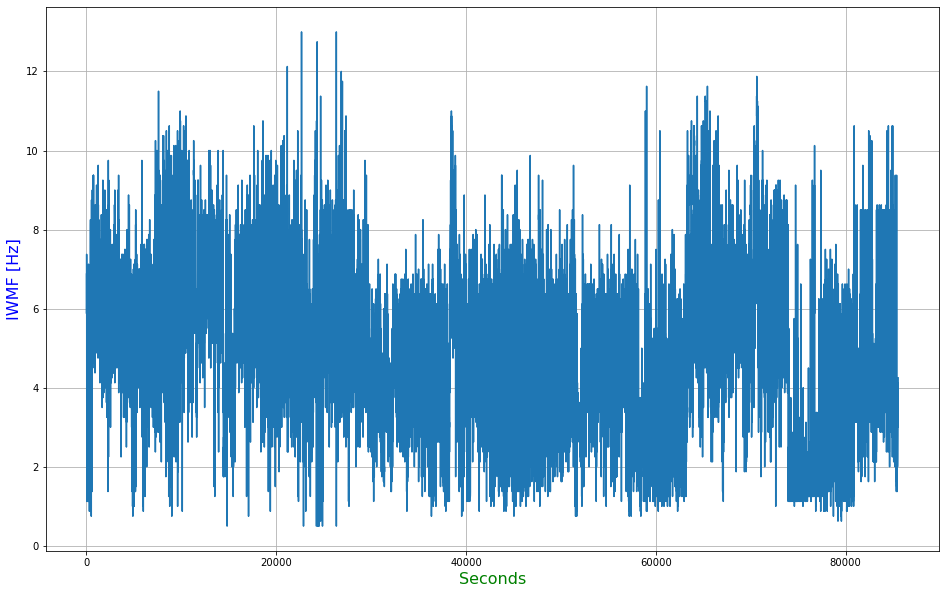

In [66]:
featuretime= np.arange(1,numberofEpochs+1,1)*4 # Converting the Feature index to seconds, ie. a new feature value is generated every 4 seconds.
plt.figure(figsize=(16,10))
plt.plot(featuretime, SEF90_Feature)
plt.ylabel('IWMF [Hz]', fontsize=16, color='blue')
plt.xlabel('Seconds',color='green',fontsize=16)
plt.grid()
plt.show()

# Model Creation

In [67]:
featuretime

array([    4,     8,    12, ..., 85540, 85544, 85548])

In [68]:
features = np.column_stack((LL_Feature, RMSA_Feature,NLE_Feature,
                            Activity_Feature, Mobility_Feature, Complexity_Feature,
                            FM_Feature,BW_Feature, TP_Feature, PF_Feature, SEF90_Feature))

In [69]:
np.shape(features)

(21387, 11)

In [70]:
CzC3_labels = eeg_labels.loc[:,'Cz-C3'][featuretime].to_numpy()

In [71]:
len(CzC3_labels)

21387

In [72]:
X_train, X_test, y_train, y_test = train_test_split(features, CzC3_labels, test_size=0.3, random_state=1) # 70% training and 30% test


In [73]:
np.shape(X_train), len(X_test), len(y_train), len(y_test)

((14970, 11), 6417, 14970, 6417)

In [74]:
np.count_nonzero(y_train )

980

# Decision Tree

In [75]:
param_grid = {
    'max_depth': range(1,10)
   
}

dt = DecisionTreeClassifier()

# Use grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dt,param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: {:.2f}".format(grid_search.best_score_))

# Evaluate the model on the test set
accuracy = grid_search.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(accuracy))

Best hyperparameters:  {'max_depth': 4}
Best accuracy: 0.95
Test set accuracy: 0.95


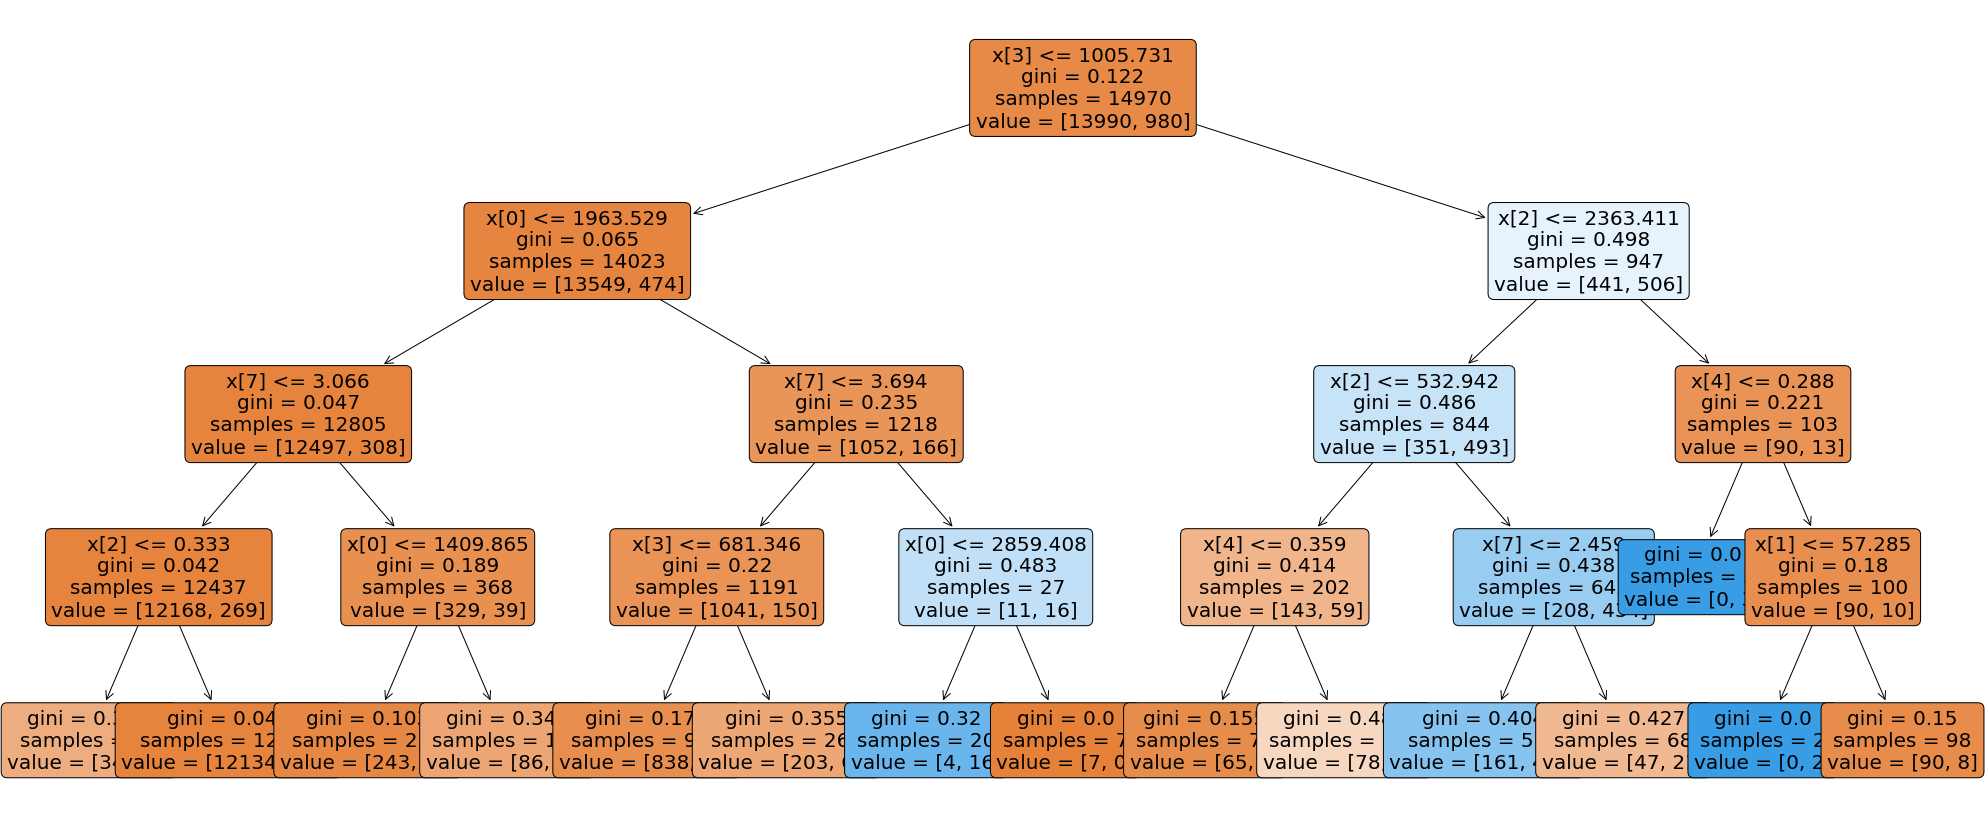

In [76]:
# Fit decision tree with optimal hyperparameters
dt_best = DecisionTreeClassifier(max_depth=grid_search.best_params_['max_depth'])
dt_best.fit(X_train, y_train)
# Plot the decision tree
plt.figure(figsize=(35, 15))
plot_tree(dt_best, filled=True, rounded=True, fontsize=20)
plt.show()

In [77]:
pred = dt_best.predict(X_test )

table = confusion_matrix(y_true = y_test,y_pred = pred)
print(table)

# Extract values from the confusion matrix
tn, fp, fn, tp = table.ravel()

# Calculate specificity and sensitivity
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

print("Specificity: {:.2f}".format(specificity))
print("Sensitivity: {:.2f}".format(sensitivity))

[[5895   90]
 [ 247  185]]
Specificity: 0.98
Sensitivity: 0.43


# Random Forest

In [78]:
param_grid = {
    'n_estimators': [10,50,100],
    'max_depth': range(1,8)
   
}

rf = RandomForestClassifier()

# Use grid search cross-validation to find the best hyperparameters
grid_search_2 = GridSearchCV(rf,param_grid, cv=5)
grid_search_2.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best hyperparameters: ", grid_search_2.best_params_)
print("Best accuracy: {:.2f}".format(grid_search_2.best_score_))

Best hyperparameters:  {'max_depth': 7, 'n_estimators': 100}
Best accuracy: 0.95


In [79]:
# Initialize a new instance of RandomForestClassifier with the best hyperparameters
best_n_estimators = grid_search_2.best_params_['n_estimators']
best_max_depth = grid_search_2.best_params_['max_depth']
rf_best = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth)

# Fit the model on the training data
rf_best.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = rf_best.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(accuracy))

Test set accuracy: 0.95


In [80]:
pred = rf_best.predict(X_test)

In [81]:
sum(pred)

287.0

In [82]:
table = confusion_matrix(y_test,pred )
table

array([[5893,   92],
       [ 237,  195]], dtype=int64)

In [83]:
rf_best.feature_importances_

array([0.1702485 , 0.19185196, 0.15046466, 0.18992765, 0.04275694,
       0.01677432, 0.03440126, 0.05395444, 0.08205403, 0.0267382 ,
       0.04082804])

In [84]:
# Extract values from the confusion matrix
tn, fp, fn, tp = table.ravel()

# Calculate specificity and sensitivity
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

print("Specificity: {:.2f}".format(specificity))
print("Sensitivity: {:.2f}".format(sensitivity))

Specificity: 0.98
Sensitivity: 0.45


Model performs poorly at recognising epcohs with seizures

This is due to class imbalance

Perform undersampling to make both classes have equal samples

In [85]:
from imblearn.under_sampling import RandomUnderSampler

# Create the undersampler object
undersampler = RandomUnderSampler(random_state=42)

# Fit and transform the training data
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

In [86]:
len(X_train_resampled), len(y_train_resampled), np.shape(X_train_resampled)

(1960, 1960, (1960, 11))

In [87]:
np.count_nonzero(y_train_resampled)

980

# Decision Tree on Resampled Data

In [88]:
param_grid = {
    'max_depth': range(1,10)
   
}

dt = DecisionTreeClassifier()

# Use grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dt,param_grid, cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters and the corresponding accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: {:.2f}".format(grid_search.best_score_))

# Evaluate the model on the test set
accuracy = grid_search.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(accuracy))

Best hyperparameters:  {'max_depth': 4}
Best accuracy: 0.79
Test set accuracy: 0.89


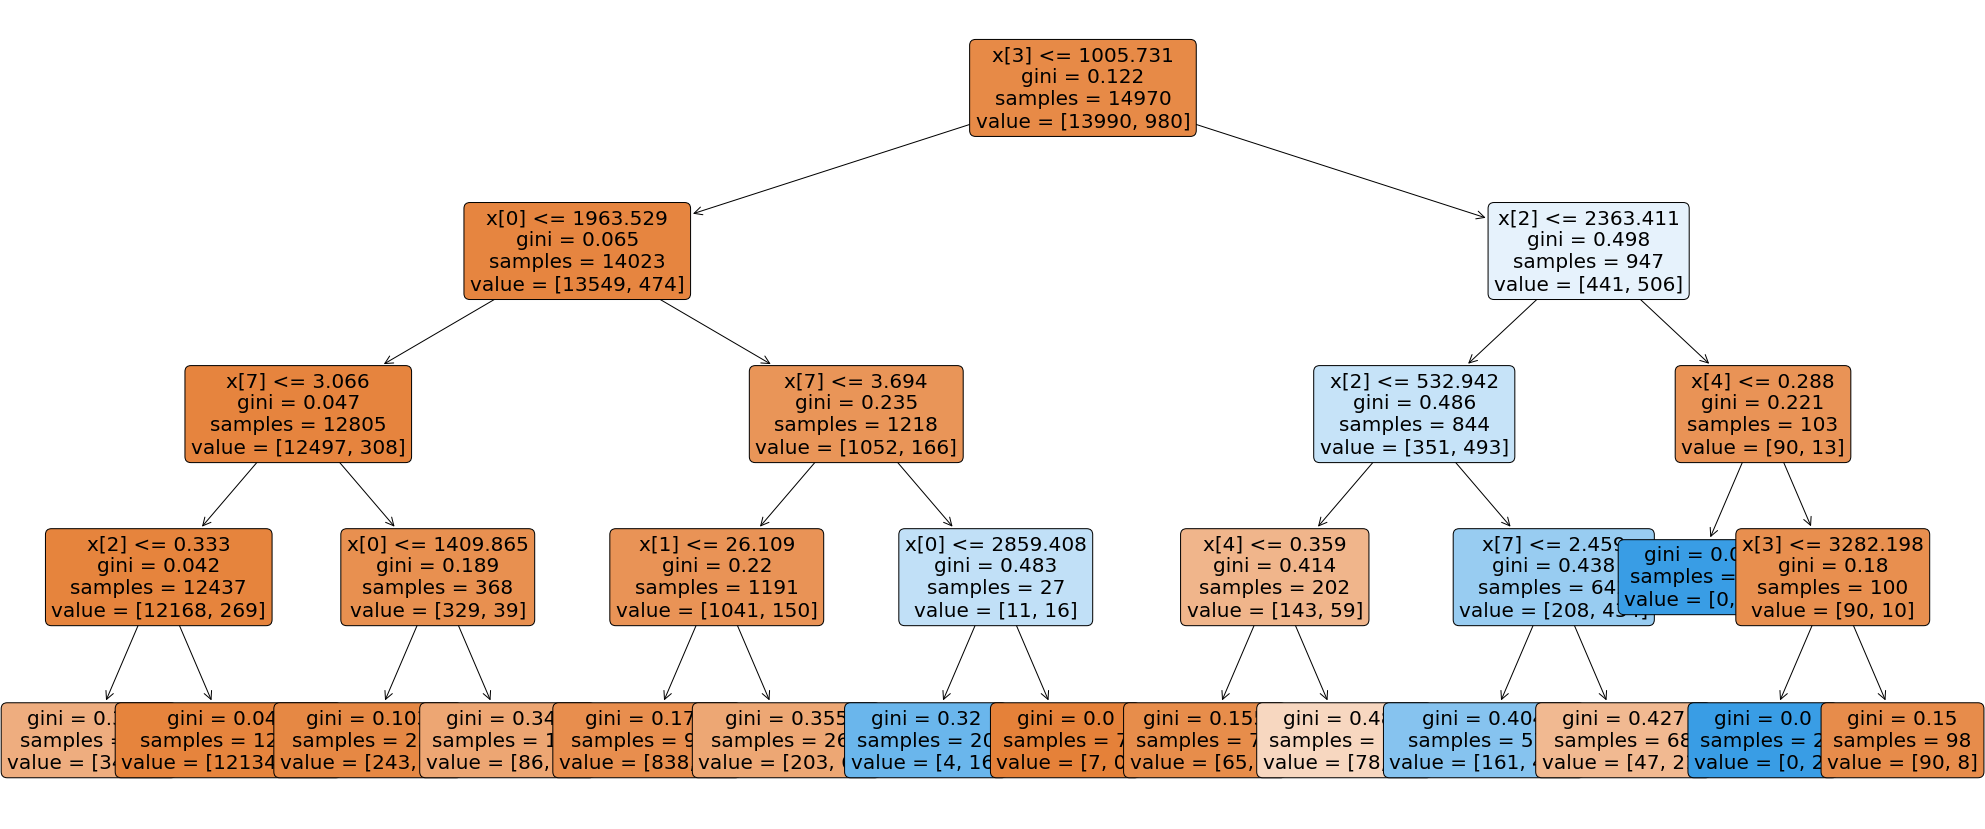

In [89]:
# Fit decision tree with optimal hyperparameters
dt_best = DecisionTreeClassifier(max_depth=grid_search.best_params_['max_depth'])
dt_best.fit(X_train, y_train)
# Plot the decision tree
plt.figure(figsize=(35, 15))
plot_tree(dt_best, filled=True, rounded=True, fontsize=20)
plt.show()

In [90]:
pred = dt_best.predict(X_test )
dt_pred_prob = dt_best.predict_proba(X_test)


table = confusion_matrix(y_true = y_test,y_pred = pred)
print(table)

# Extract values from the confusion matrix
tn, fp, fn, tp = table.ravel()

# Calculate specificity and sensitivity
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

print("Specificity: {:.2f}".format(specificity))
print("Sensitivity: {:.2f}".format(sensitivity))

[[5895   90]
 [ 247  185]]
Specificity: 0.98
Sensitivity: 0.43


In [91]:
#Define function to plot ROC curve
def PlotRocCurve(y_test, pred_prob):
    # calculate fpr, tpr, thresholds and auc
    fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:,1])
    roc_auc = auc(fpr, tpr)

    # plot ROC curve
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()  

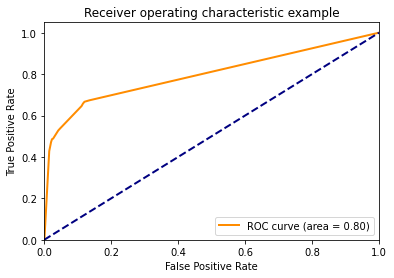

In [92]:
PlotRocCurve(y_test, dt_pred_prob)

# RF on Resampled data

In [93]:
param_grid = {
    'n_estimators': [10,50,100],
    'max_depth': range(1,8)
   
}

rf = RandomForestClassifier()

# Use grid search cross-validation to find the best hyperparameters
grid_search_2 = GridSearchCV(rf,param_grid, cv=5)
grid_search_2.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters and the corresponding accuracy
print("Best hyperparameters: ", grid_search_2.best_params_)
print("Best accuracy: {:.2f}".format(grid_search_2.best_score_))

Best hyperparameters:  {'max_depth': 7, 'n_estimators': 50}
Best accuracy: 0.81


In [94]:
# Initialize a new instance of RandomForestClassifier with the best hyperparameters
best_n_estimators = grid_search_2.best_params_['n_estimators']
best_max_depth = grid_search_2.best_params_['max_depth']
rf_best = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth)

# Fit the model on the training data
rf_best.fit(X_train_resampled, y_train_resampled)

# Evaluate the model on the test set
accuracy = rf_best.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(accuracy))

Test set accuracy: 0.87


In [201]:
def ConfusionMatrixMetrics(y_test, pred):
    table = confusion_matrix(y_true = y_test,y_pred = pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=table)
    disp.plot()
    
    # Extract values from the confusion matrix
    tn, fp, fn, tp = table.ravel()

    # Calculate specificity and sensitivity
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)

    print("Specificity: {:.2f}".format(specificity))
    print("Sensitivity: {:.2f}".format(sensitivity))

Specificity: 0.91
Sensitivity: 0.72


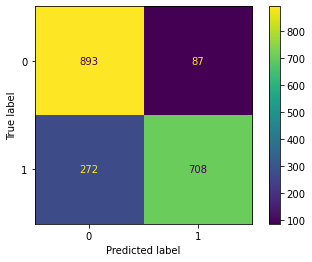

In [202]:
pred_test = rf_best.predict(X_train_resampled)
ConfusionMatrixMetrics(y_train_resampled, pred_test)

In [203]:
pred = rf_best.predict(X_test )
rf_pred_prob = rf_best.predict_proba(X_test)

Specificity: 0.89
Sensitivity: 0.65


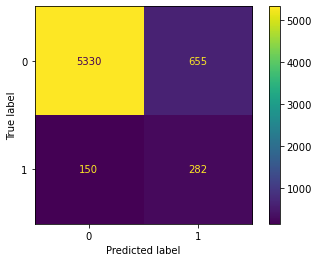

In [204]:
ConfusionMatrixMetrics(y_test, pred)

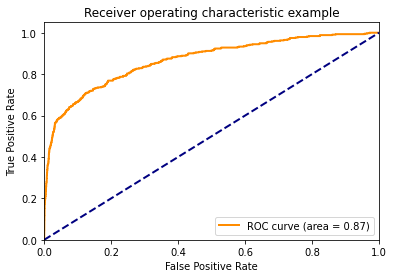

In [98]:
PlotRocCurve(y_test,rf_pred_prob)